In [1]:
from dataset import MNIST, viz_ndarray
from dataloader import DataLoader
from transforms import *
from torchvision import datasets, transforms
import torch

data/MNIST/raw/train-images-idx3-ubyte.gz already exists
data/MNIST/raw/train-images-idx3-ubyte already exists
data/MNIST/raw/t10k-images-idx3-ubyte.gz already exists
data/MNIST/raw/t10k-images-idx3-ubyte already exists
data/MNIST/raw/train-labels-idx1-ubyte.gz already exists
data/MNIST/raw/train-labels-idx1-ubyte already exists
data/MNIST/raw/t10k-labels-idx1-ubyte.gz already exists
data/MNIST/raw/t10k-labels-idx1-ubyte already exists


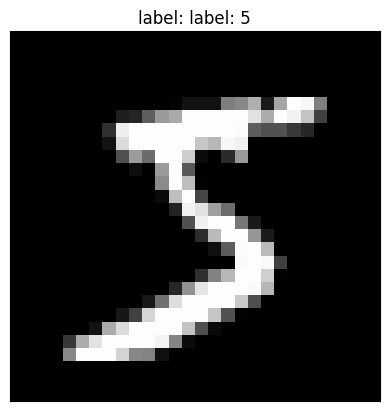

-- these are examples of training 5 data points (shape of tensor and label):
(1, 28, 28) 5
(1, 28, 28) 0
(1, 28, 28) 4
(1, 28, 28) 1
(1, 28, 28) 9
x type: <class 'tensor.Tensor'>, y type: <class 'int'>
x shape: (1, 28, 28), y shape: no shape its an int


In [14]:
train_data=MNIST(root='data', train=True, download=True)

viz_ndarray(train_data[0][0],label=f'label: {train_data[0][1]}', squeeze=True)
print('-- these are examples of training 5 data points (shape of tensor and label):')
for i in range(5):
    print(train_data[i][0].shape, train_data[i][1])

for x,y in train_data:
    print(f'x type: {type(x)}, y type: {type(y)}')
    print(f'x shape: {x.shape}, y shape: no shape its an int')
    break

In [4]:
torch_train_data = datasets.MNIST('data', train=True, download=True)
print('-- these are examples of training 5 data points (shape of tensor and label):')
for i in range(5):
    print(torch_train_data[i][0].shape, torch_train_data[i][1])
for x,y in torch_train_data:
    print(f'x type: {type(x)} and dtype: {x.dtype}, y type: {type(y)}')
    print(f'x shape: {x.shape}, y shape: no shape its an int')
    break

-- these are examples of training 5 data points (shape of tensor and label):


AttributeError: 'Image' object has no attribute 'shape'

# Transforms

### ToTensor

In [31]:
train_data=MNIST(root='data', train=True, download=True)

x=train_data[0][0]
print(f'before transform: min: {np.min(x.data)}, max: {np.max(x.data)}')
ToTensor()(x) #performs transformation inplace, now x is modified
print(f'after transform: min: {np.min(x.data)}, max: {np.max(x.data)}')

before transform: min: 0, max: 255
 :O already a tensor
after transform: min: 0.0, max: 1.0


Now putting it into use:

In [ ]:
train_data=MNIST(root='data', train=True, download=True, transform=ToTensor())

# DataLoader

In [17]:
train_loader = DataLoader(train_data, batch_size=32)

In [ ]:
for x,y in train_loader:
    print(f'x type: {type(x)}, y type: {type(y)}')
    print(f'x shape: {x.shape}, y shape: {y.shape}')
    print('data:', x)
    print('label:', y)
    break

In [ ]:
torch_train_loader=torch.utils.data.DataLoader(torch_train_data, batch_size=32)

for x,y in torch_train_loader:
    print(f'x type: {type(x)} and dtype: {x.dtype}, y type: {type(y)}')
    print(f'x shape: {x.shape}, y shape: {y.shape}')
    print('data:', x)
    print('label:', y)
    break

In [ ]:
for i,(x, y) in enumerate(train_loader):
    print(f'batch number: {i} | x shape: {x.shape}  |  y: {y}, type y: {type(y)}')
    if i==5:
        break